In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis'].map({'M': 1, 'B': 0})

In [7]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## PCA implementation

In [9]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.component = None
        self.mean = None

    def fit(self, x):
        #mean of the data
        self.mean = np.mean(x, axis=0)
        #covariance of data
        x = x - self.mean
        cov = np.cov(x.T)
        #eigen values and eigen vectors 
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        #eigenvectors is a coloumn vector
        eigenvectors = eigenvectors.T
        #sort the eigen values and eigen vectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        #store the first n eigen vectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, x):
        x = x - self.mean
        return np.dot(x, self.components.T)



## test PCA

In [10]:
#plot the data 
pca = PCA(2)
pca.fit(X_std)
x_projected = pca.transform(X_std)
print('shape of x', X_std.shape)
print('shape of x_projected', x_projected.shape)

shape of x (569, 30)
shape of x_projected (569, 2)


# implement kmeans from scratsh 

In [11]:
class KMeans:

    def __init__(self, k=5, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        # list of lists containing the points belonging to each cluster
        self.clusters = [[] for _ in range(self.k)]
        # the centers of the clusters
        self.centroids = []

    def fit(self, x):
        self.x = x
        self.n_samples, self.n_features = x.shape
        #initialize the centroids
        random_sample_idx = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.x[idx] for idx in random_sample_idx]
        #optimization
        for _ in range(self.max_iters):
            #update the clusters
            self.clusters = self._create_clusters(self.centroids)
            #update the centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            #check if converged
            if self._is_converged(centroids_old, self.centroids):
                break

        return self._get_cluster_labels(self.clusters)

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        for idx, cluster in enumerate(clusters):
            if len(cluster) > 0:
                cluster_mean = np.mean(self.x[cluster], axis=0)
                centroids[idx] = cluster_mean
            else:
                # If the cluster is empty, assign a random point as the centroid
                random_idx = np.random.choice(self.n_samples)
                centroids[idx] = self.x[random_idx]
        return centroids

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.x):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _is_converged(self, centroids_old, centroids):
        distances = [self._euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def _closest_centroid(self, sample, centroids):
        distances = [self._euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def compute_sse(self):
        sse = 0
        for idx, cluster in enumerate(self.clusters):
            centroid = self.centroids[idx]
        for sample_idx in cluster:
            sample = self.x[sample_idx]
            sse += self._euclidean_distance(sample, centroid) ** 2
        return sse


In [12]:
def elbow_method(X, max_k=10):
    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(k=k, max_iters=300)
        kmeans.fit(X)
        sse.append(kmeans.compute_sse())
    return sse

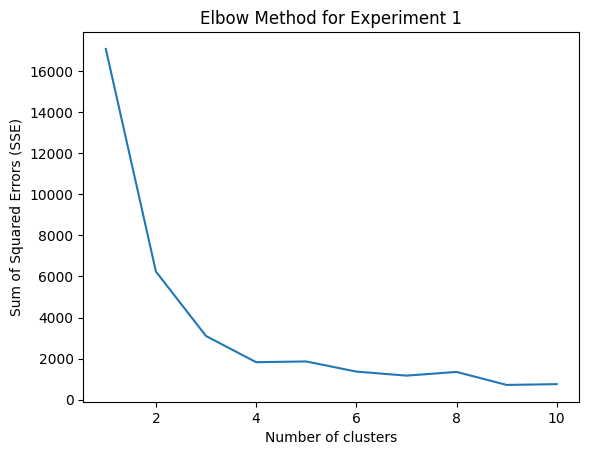

In [13]:
# Plot SSE for different k values
sse_values = elbow_method(X_std)
plt.plot(range(1, len(sse_values) + 1), sse_values)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Experiment 1')
plt.show()

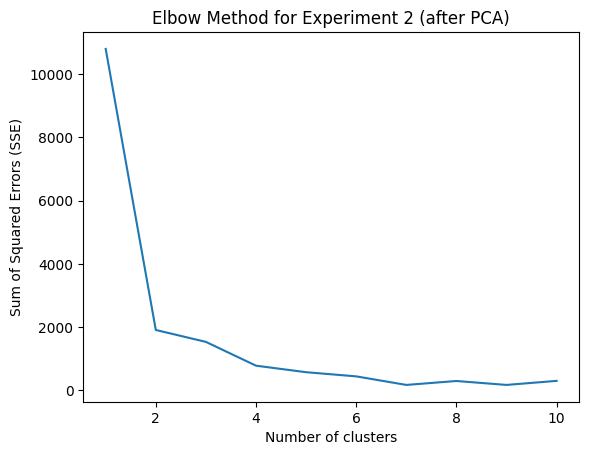

In [14]:
# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
pca.fit(X_std)
X_pca = pca.transform(X_std)

# Apply the elbow method to find the best k clusters after PCA
sse_values_pca = elbow_method(X_pca)
plt.plot(range(1, len(sse_values_pca) + 1), sse_values_pca)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Experiment 2 (after PCA)')
plt.show()

In [15]:
best_k_exp1 = np.argmin(sse_values) + 1
best_k_exp2 = np.argmin(sse_values_pca) + 1

print(f"Best K for Experiment 1: {best_k_exp1}")
print(f"Best K for Experiment 2 (after PCA): {best_k_exp2}")


Best K for Experiment 1: 9
Best K for Experiment 2 (after PCA): 7


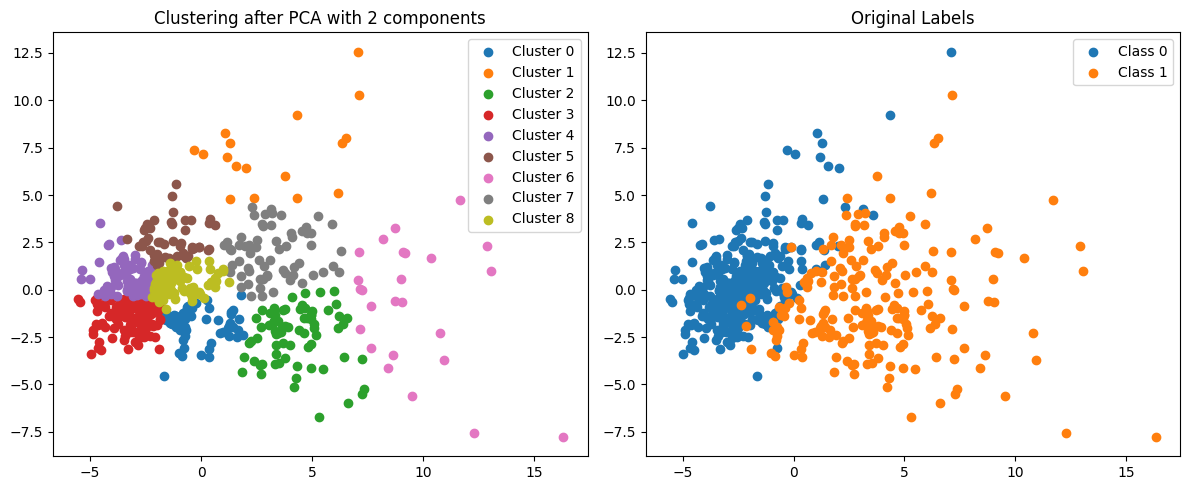

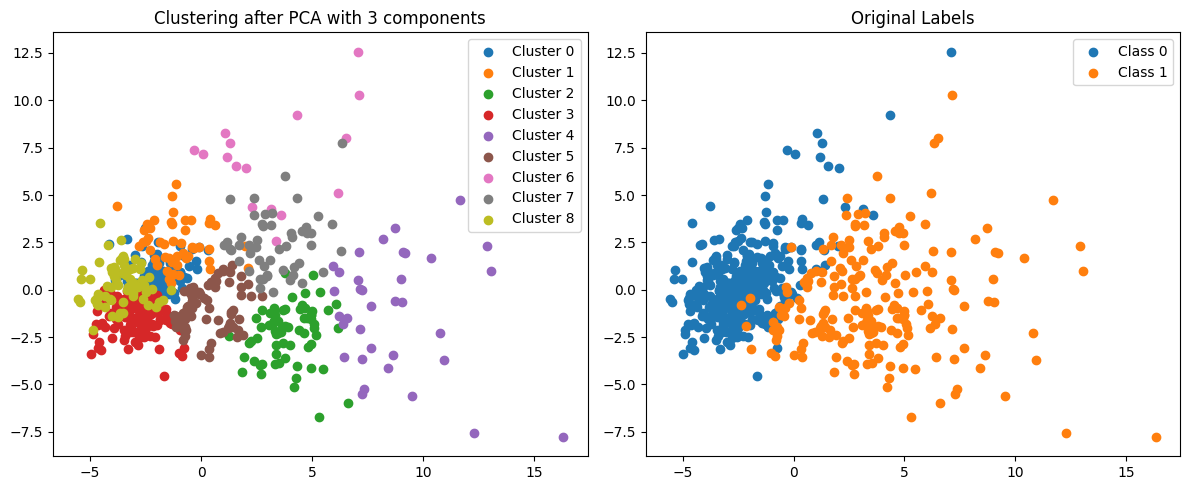

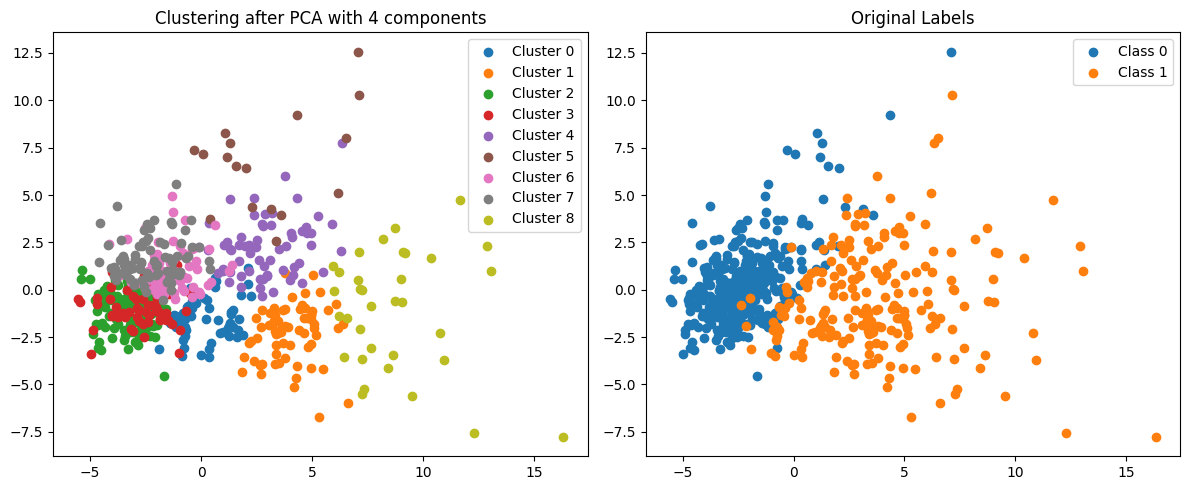

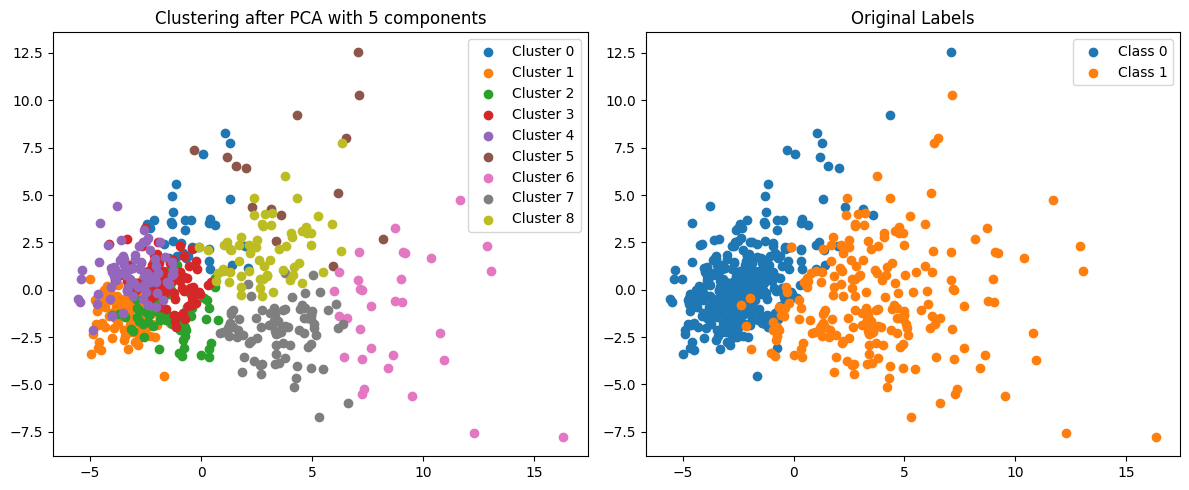

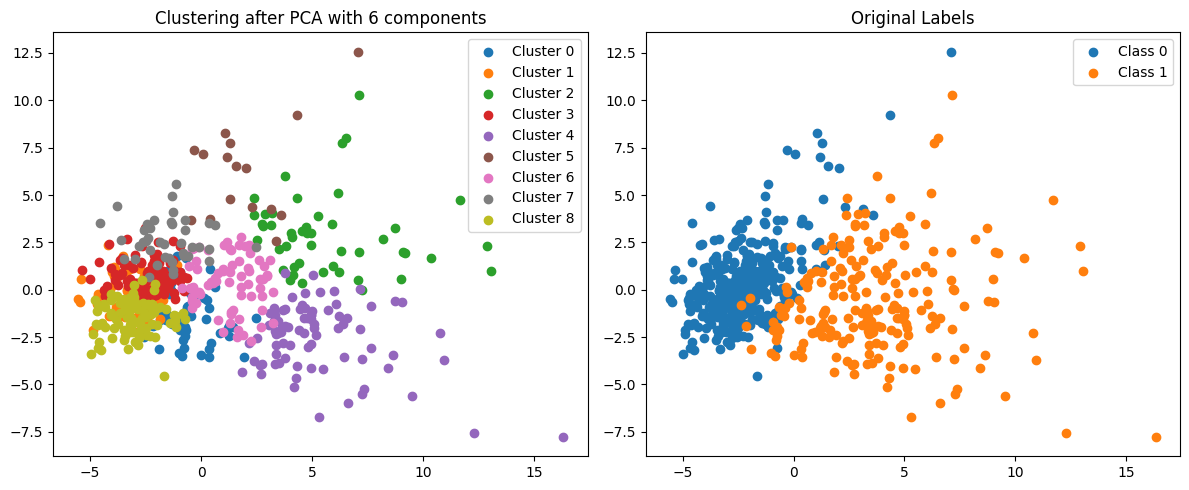

In [16]:
num_components_list = [2, 3, 4, 5, 6]
for num_components in num_components_list:
    # Apply PCA
    pca = PCA(n_components=num_components)
    pca.fit(X_std)
    X_pca = pca.transform(X_std)

    # Apply KMeans
    kmeans = KMeans(k=best_k_exp1)  # Use the best k from Experiment 1
    labels = kmeans.fit(X_pca)

    # Visualization - Compare with original labels
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Visualize clusters after PCA
    for i in range(best_k_exp1):
        cluster_points = X_pca[np.where(labels == i)]
        axs[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
    axs[0].set_title(f'Clustering after PCA with {num_components} components')
    axs[0].legend()

    # Visualize original labels
    for i in range(2):  # Considering 2 classes in original labels
        class_points = X_pca[np.where(y == i)]
        axs[1].scatter(class_points[:, 0], class_points[:, 1], label=f'Class {i}')
    axs[1].set_title('Original Labels')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


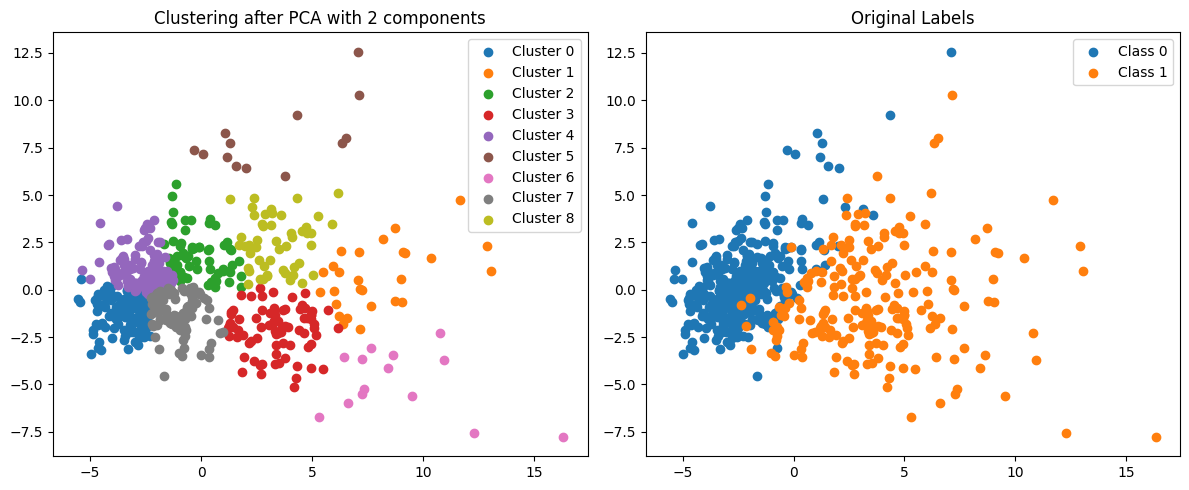

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
X_pca = pca.fit_transform(X_std)

# Apply KMeans
kmeans = KMeans(n_clusters=best_k_exp1)  # Use the best k from Experiment 1
labels = kmeans.fit_predict(X_pca)

# Visualization - Compare with original labels
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Visualize clusters after PCA
for i in range(best_k_exp1):
    cluster_points = X_pca[np.where(labels == i)]
    axs[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
axs[0].set_title(f'Clustering after PCA with {pca.n_components_} components')
axs[0].legend()

# Visualize original labels
for i in range(2):  # Considering 2 classes in original labels
    class_points = X_pca[np.where(y == i)]
    axs[1].scatter(class_points[:, 0], class_points[:, 1], label=f'Class {i}')
axs[1].set_title('Original Labels')
axs[1].legend()

plt.tight_layout()
plt.show()
